In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

In [45]:
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

fe = fm.FontEntry(
    fname=r'./NanumSquareNeo-Variable.ttf',   # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) # 폰트 설정

In [46]:
data = pd.read_csv("1992_2020_kpop.csv", engine='python',encoding='CP949')

train_data = pd.DataFrame(data)

In [47]:
train_data.head()

,년도,가수,제목,성별,장르,최고순위,작사,작곡,소속사,가사
0,19920000,잼,난 멈추지 않는다,mixed,댄스,1,조진호,조진호,DSP 미디어,이제 모든걸 다시 시작해 내겐 아직도 시간이 있어 때론 상처가 좌절로 남아 돌이킬수...
1,19920000,잼,우리 모두 사랑하자,mixed,댄스,7,조진수,조진수,DSP 미디어,워 우리 모두 사랑하자 우리의 젊은날을 위하여 우리 모두 춤을 추자 가벼운 인스텝 ...
2,19920000,잼,이유,mixed,발라드,0,조진호,조진호,DSP 미디어,어둠은 드리워지고 이제는 우리들만의 시간이 지친듯이 내 가슴속에 밀려와 나를 재우고...
3,19920000,잼,18번가의 비밀,mixed,댄스,0,조진호,조진호,DSP 미디어,끝없는 어둠 속을 천천히 걷고 있어 어디서 본 듯한 야릇한 느낌이야 거리는 비에 젖...
4,19920000,잼,요즘 친구들,mixed,댄스,0,조진수,조진호,DSP 미디어,요즘 친구들은 흥 정말 진정한 친구가 뭔지 잘 몰라 말로만 떠들고 자기들이 다만 그...


In [48]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7235 entries, 0 to 7234
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      7235 non-null   int64 
 1   가수      7235 non-null   object
 2   제목      7235 non-null   object
 3   성별      7235 non-null   object
 4   장르      7235 non-null   object
 5   최고순위    7235 non-null   object
 6   작사      7194 non-null   object
 7   작곡      7183 non-null   object
 8   소속사     7026 non-null   object
 9   가사      7233 non-null   object
dtypes: int64(1), object(9)
memory usage: 565.4+ KB


In [49]:
train_data.shape # 7235개 곡, 10개 속성

(7235, 10)

In [50]:
train_data.columns

Index(['년도', '가수', '제목', '성별', '장르', '최고순위', '작사', '작곡', '소속사', '가사'], dtype='object')

In [51]:
train_data['소속사'].describe()

count            7026
unique            251
top       (주)SM엔터테인먼트
freq              716
Name: 소속사, dtype: object

In [52]:
# 각 attribute에 따른 N/A값의 수
for attribute in train_data.columns:
    print(train_data[attribute].isnull().sum()) 

0
0
0
0
0
0
41
52
209
2


## 가수별 데이터 분석

In [53]:
train_data['가수'].describe()

count      7235
unique      455
top       방탄소년단
freq        317
Name: 가수, dtype: object

In [54]:
train_data['소속사'].describe()
     

count            7026
unique            251
top       (주)SM엔터테인먼트
freq              716
Name: 소속사, dtype: object

In [55]:
#groupby 가수: 빈도수 계산
singer_count=train_data.groupby('가수',sort = False).count().rename(columns = {'년도': 'count'})
singer_count=singer_count.reset_index().rename(columns={"index": "singer"})
singer_count=singer_count[['가수','count']]

topsinger=singer_count.sort_values('count',ascending = False).head(50)
topsinger.head(10)

,가수,count
267,방탄소년단,317
63,동방신기,280
334,TWICE (트와이스),196
319,몬스타엑스,176
72,슈퍼주니어,155
47,오렌지,143
296,Red Velvet (레드벨벳),141
291,마마무 (Mamamoo),139
34,쥬얼리,134
74,빅뱅,134


In [56]:
#groupby 소속사: 빈도수 계산
E_count=train_data.groupby('소속사',sort = False).count().rename(columns = {'년도': 'count'})
E_count=E_count.reset_index().rename(columns={"index": "소속사"})
E_count=E_count[['소속사','count']]

topE=E_count.sort_values('count',ascending = False).head(50)

topE.head(10)

,소속사,count
43,(주)SM엔터테인먼트,716
179,JYP 엔터테인먼트,401
121,빅히트 엔터테인먼트,290
0,DSP 미디어,212
5,SM 엔터테인먼트,211
77,스타쉽 엔터테인먼트,201
50,(주)YG엔터테인먼트,171
39,YG 엔터테인먼트,148
25,스타제국,147
36,오렌지엔터테인먼트,143


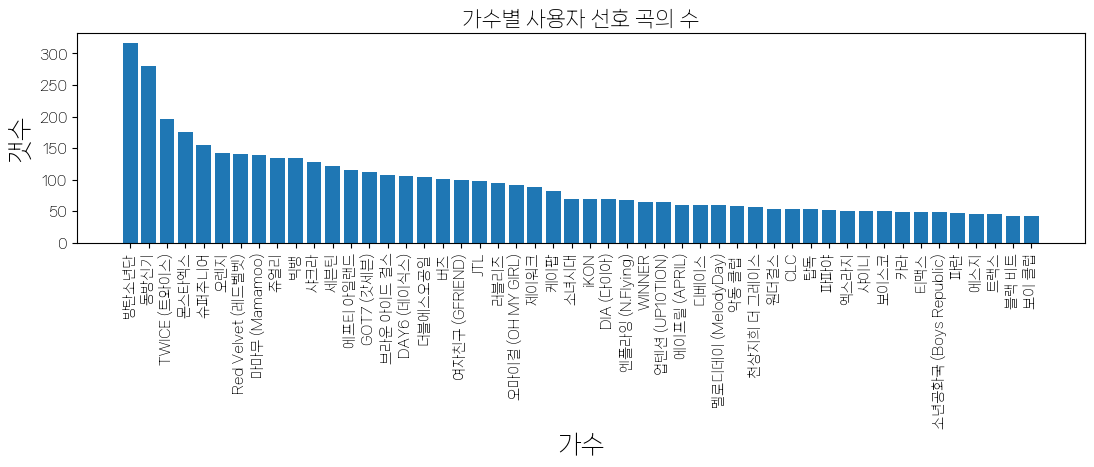

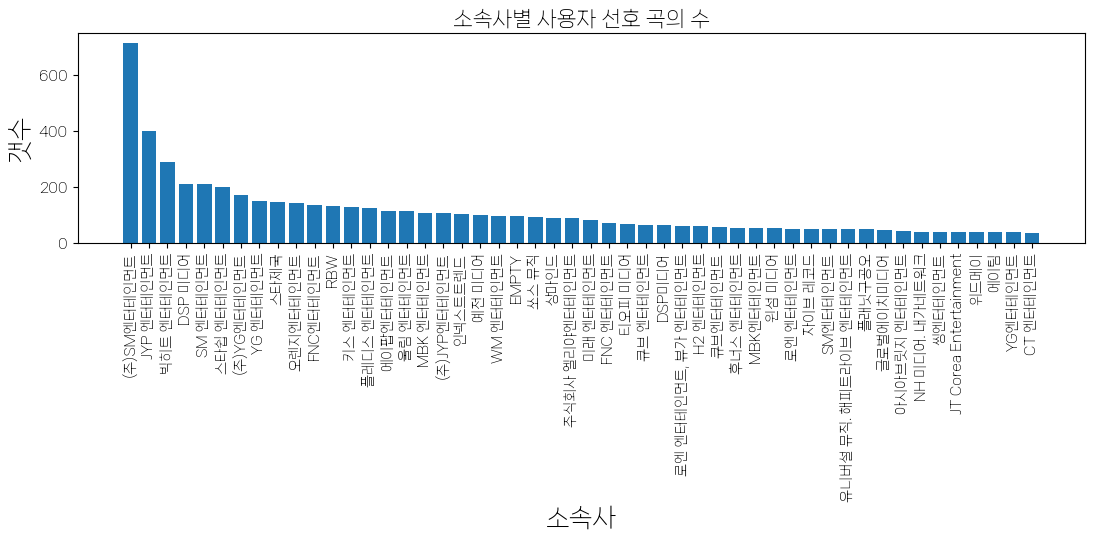

In [57]:

#시각화
index = np.arange(topsinger.shape[0])
x_name = topsinger['가수'].tolist()
plt.figure(figsize=(13,6))
plt.subplot(211)
plt.bar(index, topsinger['count'])
plt.title('가수별 사용자 선호 곡의 수', fontsize=15)
plt.xlabel('가수', fontsize=18)
plt.ylabel('갯수', fontsize=18)
plt.xticks(index, x_name, rotation= 90)
plt.rc('font', family='NanumGothic') 

index = np.arange(topE.shape[0])
x_name = topE['소속사'].tolist()
plt.figure(figsize=(13,6))
plt.subplot(212)
plt.bar(index, topE['count'])
plt.title('소속사별 사용자 선호 곡의 수', fontsize=15)
plt.xlabel('소속사', fontsize=18)
plt.ylabel('갯수', fontsize=18)
plt.xticks(index, x_name, rotation= 90)
plt.rc('font', family='NanumGothic') 

plt.show()


## 성별별 데이터 분석

In [58]:
train_data['성별'].describe()


count     7235
unique      15
top       male
freq      2543
Name: 성별, dtype: object

In [59]:
#groupby 성별
gender_count=train_data.groupby('성별',sort = True).count()

train_data.loc[train_data["성별"] == "MALE","성별"] = "male"
train_data.loc[train_data["성별"] == "Male","성별"] = "male"
train_data.loc[train_data["성별"] == "male","성별"] = "male"
train_data.loc[train_data["성별"] == "남","성별"] = "male"

train_data.loc[train_data["성별"] == "Famale","성별"] = "female"
train_data.loc[train_data["성별"] == "Female","성별"] = "female"
train_data.loc[train_data["성별"] == "female","성별"] = "female"
train_data.loc[train_data["성별"] == "여","성별"] = "female"

train_data.loc[train_data["성별"] == "Mixed","성별"] = "mixed"
train_data.loc[train_data["성별"] == "Mixed voices","성별"] = "mixed"
train_data.loc[train_data["성별"] == "all","성별"] = "mixed"
train_data.loc[train_data["성별"] == "mixed voices","성별"] = "mixed"
train_data.loc[train_data["성별"] == "mix","성별"] = "mixed"
train_data.loc[train_data["성별"] == "mixed","성별"] = "mixed"

In [60]:
gender_count=train_data.groupby('성별',sort = True).count()
gender_count #남자 가수 4366, 여자가수 2786, 혼성 83

,년도,가수,제목,장르,최고순위,작사,작곡,소속사,가사
성별,,,,,,,,,
female,1,1,1,1,1,1,1,1,1
female,2785,2785,2785,2785,2785,2782,2782,2674,2785
male,4366,4366,4366,4366,4366,4331,4320,4268,4364
mixed,83,83,83,83,83,80,80,83,83


## 장르별 데이터 분석

In [61]:
train_data['장르'].describe()

count     7235
unique      54
top         댄스
freq      3419
Name: 장르, dtype: object

In [62]:
#장르
gnr_count=train_data.groupby('장르').count().rename(columns = {'년도': 'count'})
gnr_count.loc[:,'비율(%)'] = round(gnr_count['count']/sum(gnr_count['count'])*100,2)
gnr_count=gnr_count[['count','비율(%)']]
gnr_count=gnr_count.reset_index().rename(columns={"index": "gnr"})
gnr_list=gnr_count.sort_values('count',ascending = False)

gnr_count.sort_values('count',ascending=False).head(10)

,장르,count,비율(%)
12,댄스,3419,47.26
27,발라드,1458,20.15
21,랩/힙합,692,9.56
24,록/메탈,517,7.15
2,J-POP,280,3.87
4,R&B/Soul,277,3.83
32,"발라드, 국내드라마",111,1.53
3,POP,69,0.95
16,"댄스, 국내드라마",49,0.68
18,"댄스, 랩/힙합",41,0.57


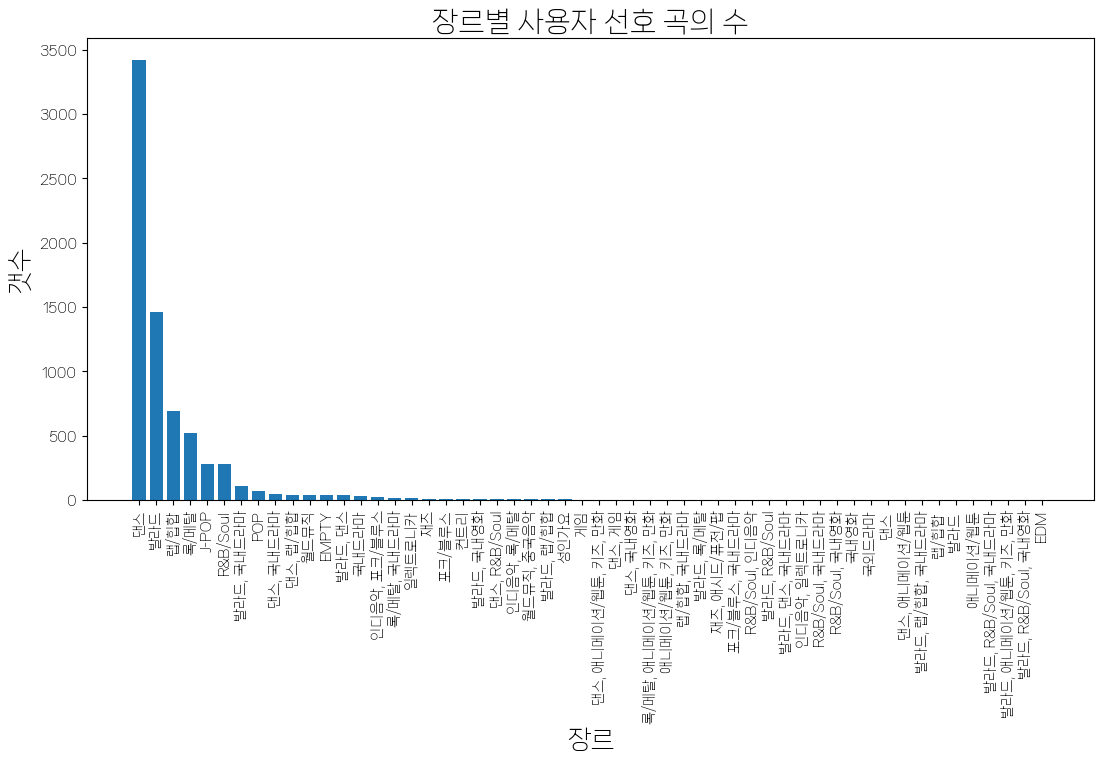

In [63]:
index = np.arange(gnr_list.shape[0])
x_name = gnr_list['장르'].tolist()

plt.figure(figsize=(13,6))
plt.bar(index, gnr_list['count'])
plt.title('장르별 사용자 선호 곡의 수', fontsize=20)
plt.xlabel('장르', fontsize=18)
plt.ylabel('갯수', fontsize=18)
plt.xticks(index, x_name,rotation=90)
plt.rc('font', family='NanumGothic') 

plt.show()
     

## 가사의 빈도 수 분석

In [64]:
print(train_data['가사'].isnull().sum()) #2 가사 NULL

2


In [65]:
# 중복된 가사 확인
train_data.shape[0] - train_data['가사'].nunique()
if (train_data.duplicated('가사')).any == True:
  print("중복된 가사 확인")

In [66]:
#객체 호출
okt = Okt()

In [67]:
# 변수 okja에 전체가사 다시저장
words=train_data['가사']
okja = []
for line in words:
    okja.append(line)

In [68]:
# 각 문장별로 형태소 구분하기
sentences_tag = []
i=0
for sentence in okja:
  try:
    morph = okt.pos(sentence)
    sentences_tag.append(morph)
    if i %1000 == 0:
      print("[{}/{}]done".format(i,len(okja)))
    i +=1
  except:
    print("NULL")
print(len(sentences_tag))

[0/7235]done
[1000/7235]done
[2000/7235]done
[3000/7235]done
[4000/7235]done
[5000/7235]done
[6000/7235]done
NULL
NULL
[7000/7235]done
7233


In [69]:
# 명사 혹은 형용사인 품사만 선별해 리스트에 담기 ### (이후 다른 품사에도 적용 가능)
noun_adj_list = []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['Noun','Adjective']:
            noun_adj_list.append(word)

# 단어의 길이가 하나인거 제거
for i,v in enumerate (noun_adj_list):
  if len(v) <2:
    noun_adj_list.pop(i)

In [70]:
# 선별된 품사별 빈도수 계산 & 상위 빈도 10위 출력
counts = Counter(noun_adj_list)
print(counts.most_common(10))

[('사랑', 16281), ('너', 8689), ('그대', 7764), ('내', 7072), ('우리', 5778), ('나', 5713), ('이제', 4504), ('없어', 4310), ('다시', 4159), ('맘', 3974)]


{'이제': 4504, '다시': 4159, '시작': 1229, '내겐': 893, '시간': 3710, '있어': 3211, '때론': 289, '상처': 777, '좌절': 33, '남아': 371, '없는': 3658, '후회': 841, '우리': 5778, '지금': 3644, '내': 7072, '아닌': 833, '신문': 6, '얘기': 947, '순': 248, '없어': 4310, '여기': 1253, '모두': 3415, '사랑': 16281, '젊은': 36, '위': 646, '가벼운': 75, '스텝': 21, '그대': 7764, '아무렇게나': 13, '거리': 558, '사람': 3759, '시선': 462, '나름': 33, '연출': 8, '자신감': 65, '있고': 229, '그것': 209, '어떤': 971, '오늘': 3239, '댄스': 7, '뮤직': 19, '좋아하고': 24, '자동차': 8, '이번': 167, '새로': 65, '청바지': 13, '좋지만': 8, '당장': 93, '이런': 1666, '재밌있게': 1, '진실한': 52, '그런': 1433, '친구': 1250, '솔직하게': 89, '괜찮으니까': 35, '뭐': 597, '힘들어요': 3, '꾸밈': 17, '어둠': 472, '가슴속': 242, '긴머리': 13, '향기': 674, '잠시': 611, '취해': 172, '채': 284, '얼마나': 477, '눈': 1931, '애처로와': 4, '이유': 755, '이해': 417, '있을까': 398, '그냥': 1537, '너': 8689, '끝없는': 82, '야릇한': 12, '느낌': 1211, '싸늘함': 1, '해지': 20, '바람': 1109, '어깨': 351, '저': 400, '멀리': 1034, '그림자': 158, '모습': 2465, '아무런': 208, '표정': 436, '앞': 676, '다른': 1682, '조용히': 88, '갑자기': 1

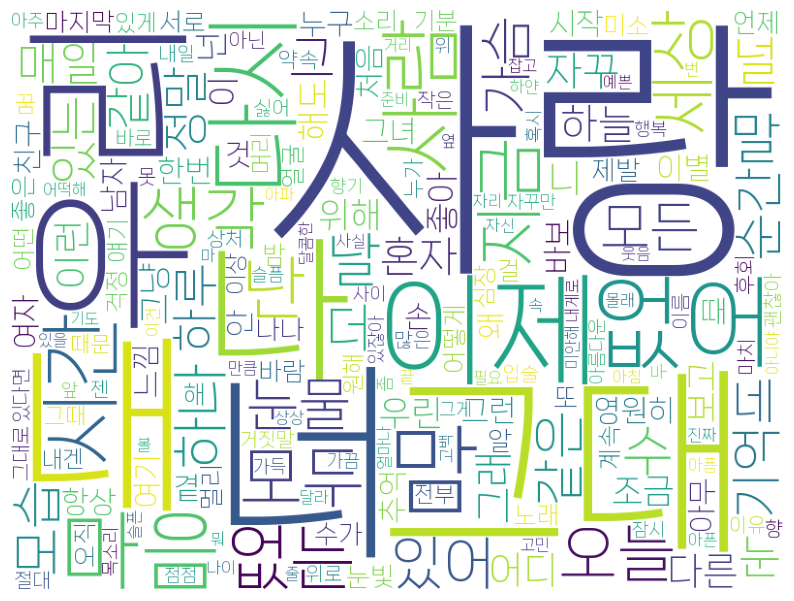

In [71]:
#WordCloud 사용하여 시각화
wc = WordCloud(font_path='./NanumSquareNeo-Variable.ttf', background_color='white', width=800, height=600)
print(dict(counts))
cloud = wc.generate_from_frequencies(dict(counts))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

## 제목별 데이터 분석

In [72]:
# 중복된 제목 확인
train_data.shape[0] - train_data['제목'].nunique()
if (train_data.duplicated('제목')).any == True:
  print("중복된 제목 확인")

In [73]:
# 변수 title 전체제목 다시저장
words=train_data['제목']
title = []
for line in words:
    title.append(line)

In [74]:
# 각 문장별로 형태소 구분하기
titles_tag = []
i=0
for sentence in title:
  try:
    morph = okt.pos(sentence)
    titles_tag.append(morph)
    if i %1000 == 0:
      print("[{}/{}]done".format(i,len(title)))
    i +=1
  except:
    print("NULL")
print(len(titles_tag))
     

[0/7235]done
[1000/7235]done
[2000/7235]done
[3000/7235]done
[4000/7235]done
[5000/7235]done
[6000/7235]done
[7000/7235]done
7235


In [75]:
# 명사 혹은 형용사인 품사만 선별해 리스트에 담기 ### (이후 다른 품사에도 적용 가능)
noun_adj_list_title = []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['Noun','Adjective']:
            noun_adj_list_title.append(word)

# 단어의 길이가 하나인거 제거
for i,v in enumerate (noun_adj_list_title):
  if len(v) <2:
    noun_adj_list_title.pop(i)
     

In [76]:
# 선별된 품사별 빈도수 계산 & 상위 빈도 10위 출력
_counts = Counter(noun_adj_list_title)
print(_counts.most_common(10))

[('사랑', 16281), ('너', 8689), ('그대', 7764), ('내', 7072), ('우리', 5778), ('나', 5713), ('이제', 4504), ('없어', 4310), ('다시', 4159), ('맘', 3974)]


{'이제': 4504, '다시': 4159, '시작': 1229, '내겐': 893, '시간': 3710, '있어': 3211, '때론': 289, '상처': 777, '좌절': 33, '남아': 371, '없는': 3658, '후회': 841, '우리': 5778, '지금': 3644, '내': 7072, '아닌': 833, '신문': 6, '얘기': 947, '순': 248, '없어': 4310, '여기': 1253, '모두': 3415, '사랑': 16281, '젊은': 36, '위': 646, '가벼운': 75, '스텝': 21, '그대': 7764, '아무렇게나': 13, '거리': 558, '사람': 3759, '시선': 462, '나름': 33, '연출': 8, '자신감': 65, '있고': 229, '그것': 209, '어떤': 971, '오늘': 3239, '댄스': 7, '뮤직': 19, '좋아하고': 24, '자동차': 8, '이번': 167, '새로': 65, '청바지': 13, '좋지만': 8, '당장': 93, '이런': 1666, '재밌있게': 1, '진실한': 52, '그런': 1433, '친구': 1250, '솔직하게': 89, '괜찮으니까': 35, '뭐': 597, '힘들어요': 3, '꾸밈': 17, '어둠': 472, '가슴속': 242, '긴머리': 13, '향기': 674, '잠시': 611, '취해': 172, '채': 284, '얼마나': 477, '눈': 1931, '애처로와': 4, '이유': 755, '이해': 417, '있을까': 398, '그냥': 1537, '너': 8689, '끝없는': 82, '야릇한': 12, '느낌': 1211, '싸늘함': 1, '해지': 20, '바람': 1109, '어깨': 351, '저': 400, '멀리': 1034, '그림자': 158, '모습': 2465, '아무런': 208, '표정': 436, '앞': 676, '다른': 1682, '조용히': 88, '갑자기': 1

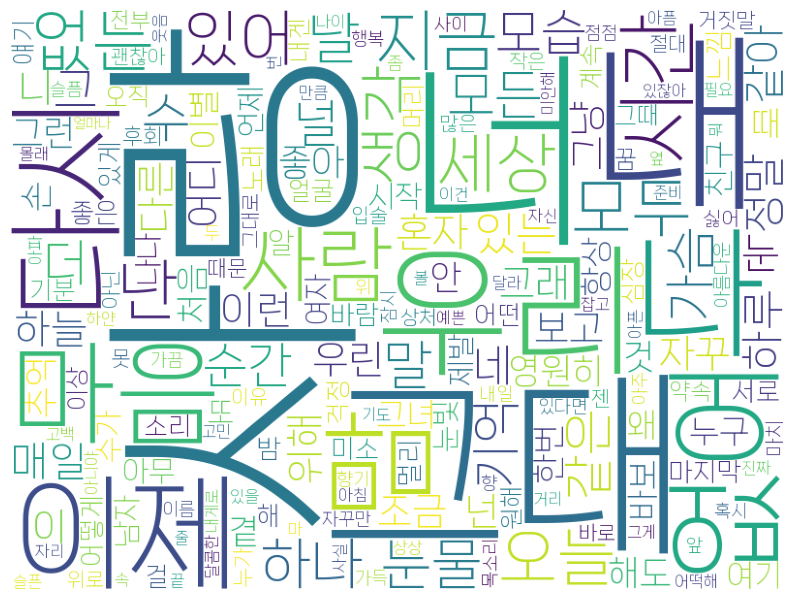

In [78]:
#WordCloud 사용하여 시각화
wc = WordCloud(font_path= './NanumSquareNeo-Variable.ttf', background_color='white', width=800, height=600)
print(dict(_counts))
cloud = wc.generate_from_frequencies(dict(_counts))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

## 최고순위 빈도 분석

In [79]:
train_data['최고순위'].describe()

count      7235
unique      104
top       EMPTY
freq       3128
Name: 최고순위, dtype: object

In [80]:
train_data['최고순위'].isnull().sum()

0

In [81]:
Top_count=train_data.groupby('최고순위').count().rename(columns = {'년도': 'count'})
Top_count=Top_count.reset_index().rename(columns={"index": "최고순위"})
Top_count=Top_count[['최고순위','count']]

Top_count = Top_count.drop(index=[103,0])
Top_count=Top_count.sort_values('count',ascending=False).head(10)

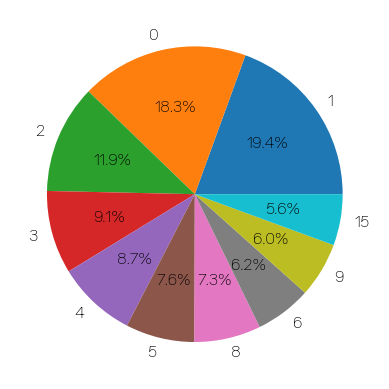

In [82]:
plt.pie(Top_count['count'], labels=Top_count['최고순위'],autopct='%1.1f%%')
plt.show()

## 작사, 작곡 빈도 분석

In [83]:
print(train_data['작사'].describe(),"\n==============")
print(train_data['작곡'].describe())

count      7194
unique     2186
top       EMPTY
freq       1246
Name: 작사, dtype: object 
count      7183
unique     2476
top       EMPTY
freq       1148
Name: 작곡, dtype: object


In [84]:
ma_count=train_data.groupby('작사').count().rename(columns = {'년도': 'count'})
ma_count=ma_count.reset_index().rename(columns={"index": "작사"})
ma_count=ma_count[['작사','count']]
ma_count.sort_values('count',ascending=False).head(10)

mu_count=train_data.groupby('작곡').count().rename(columns = {'년도': 'count'})
mu_count=mu_count.reset_index().rename(columns={"index": "작곡"})
mu_count=mu_count[['작곡','count']]

In [85]:
ma_count.sort_values('count',ascending=False).head(10)

,작사,count
173,EMPTY,1246
1243,박진영,79
197,G-DRAGON,72
2121,한성호,67
708,Young K,61
918,김이나,58
1631,유영진,53
1368,서지음,51
905,김영아,50
322,KENZIE,49


In [86]:
mu_count.sort_values('count',ascending=False).head(10)

,작곡,count
292,EMPTY,1148
1599,박진영,61
1882,용감한 형제,57
1937,유영진,49
1295,김승수,45
2120,이현도,38
1541,박근태,37
2006,이민수,36
2401,한상원,34
2458,황성제,34
